In [112]:
# Importation des packages nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
import pickle
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from joblib import dump, load
from scipy.stats import chi2_contingency
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict

%matplotlib inline

In [113]:
#On importe le fichier vgsales et on inspecte une première fois les données
df=pd.read_csv('vgsales.csv', index_col=0)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [114]:
#On vérifie le pourcentage de NAN par colonne
df.isna().sum()*100/df.shape[0]

Name            0.000000
Platform        0.000000
Year            1.632727
Genre           0.000000
Publisher       0.349440
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

In [115]:
#On enlève les lignes comportant les Nan qui sont en très petite quantité par rapport à l'ensemble des données
df=df.dropna(axis=0)

In [116]:
#On vérifie que tout à bien été néttoyé
df.isna().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [117]:
#On change le type Year en Int
df.Year=df['Year'].astype(int)

In [118]:
#On fait un describe des colonnes quantitative pour en vérifier la distribution
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [119]:
#Les données vienent de l'année 2016 et nous avons 4 jeux après cette date, nous allons donc les supprimer du DataFrame
df=df[df["Year"]<=2016]

In [120]:
#On vérifie les infos de chaque colonne
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16287 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16287 non-null  object 
 1   Platform      16287 non-null  object 
 2   Year          16287 non-null  int32  
 3   Genre         16287 non-null  object 
 4   Publisher     16287 non-null  object 
 5   NA_Sales      16287 non-null  float64
 6   EU_Sales      16287 non-null  float64
 7   JP_Sales      16287 non-null  float64
 8   Other_Sales   16287 non-null  float64
 9   Global_Sales  16287 non-null  float64
dtypes: float64(5), int32(1), object(4)
memory usage: 1.3+ MB


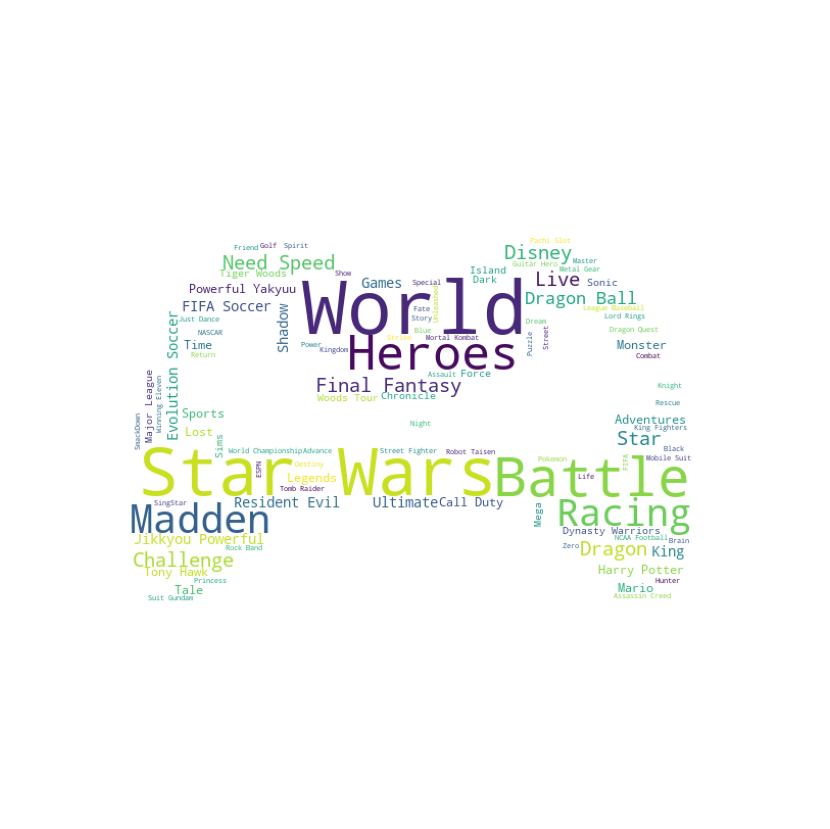

In [114]:
#On importe le mask afin d'effectuer le wordcloud aves les noms des différents jeux-vidéos
mask = np.array(Image.open("manette.jpeg"))
mask[mask == 1] = 255

mots_inutiles = ['Game', 'Edition','Collection','Portable','Adventure','sale','sales','Super','Legend','Party']

wordcloud = WordCloud(background_color = 'White',width = 800,height = 800,min_word_length=4,max_words=100, stopwords = mots_inutiles, relative_scaling = 0,mask = mask).generate(" ".join(df.Name))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

C:\Users\Thomas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Thomas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Thomas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


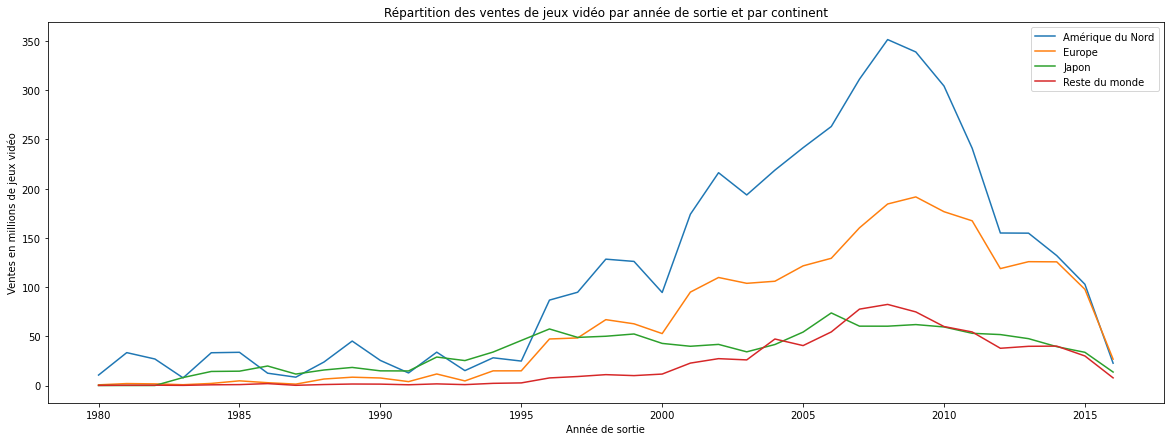

In [121]:
#On crée une fonction groupby en reroupant les ventes pour chaque partie du monde et on l'affiche sous forme de lineplot
Annual_sales= df.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
plt.figure(figsize=(20,7))
plt.title('Répartition des ventes de jeux vidéo par année de sortie et par continent')
sns.lineplot(x=Annual_sales['Year'], y=Annual_sales["NA_Sales"], label="Amérique du Nord")
sns.lineplot(Annual_sales['Year'], Annual_sales["EU_Sales"], label="Europe")
sns.lineplot(Annual_sales['Year'], Annual_sales["JP_Sales"], label="Japon")
sns.lineplot(Annual_sales['Year'], Annual_sales["Other_Sales"], label="Reste du monde")
plt.ylabel('Ventes en millions de jeux vidéo')
plt.xlabel('Année de sortie');

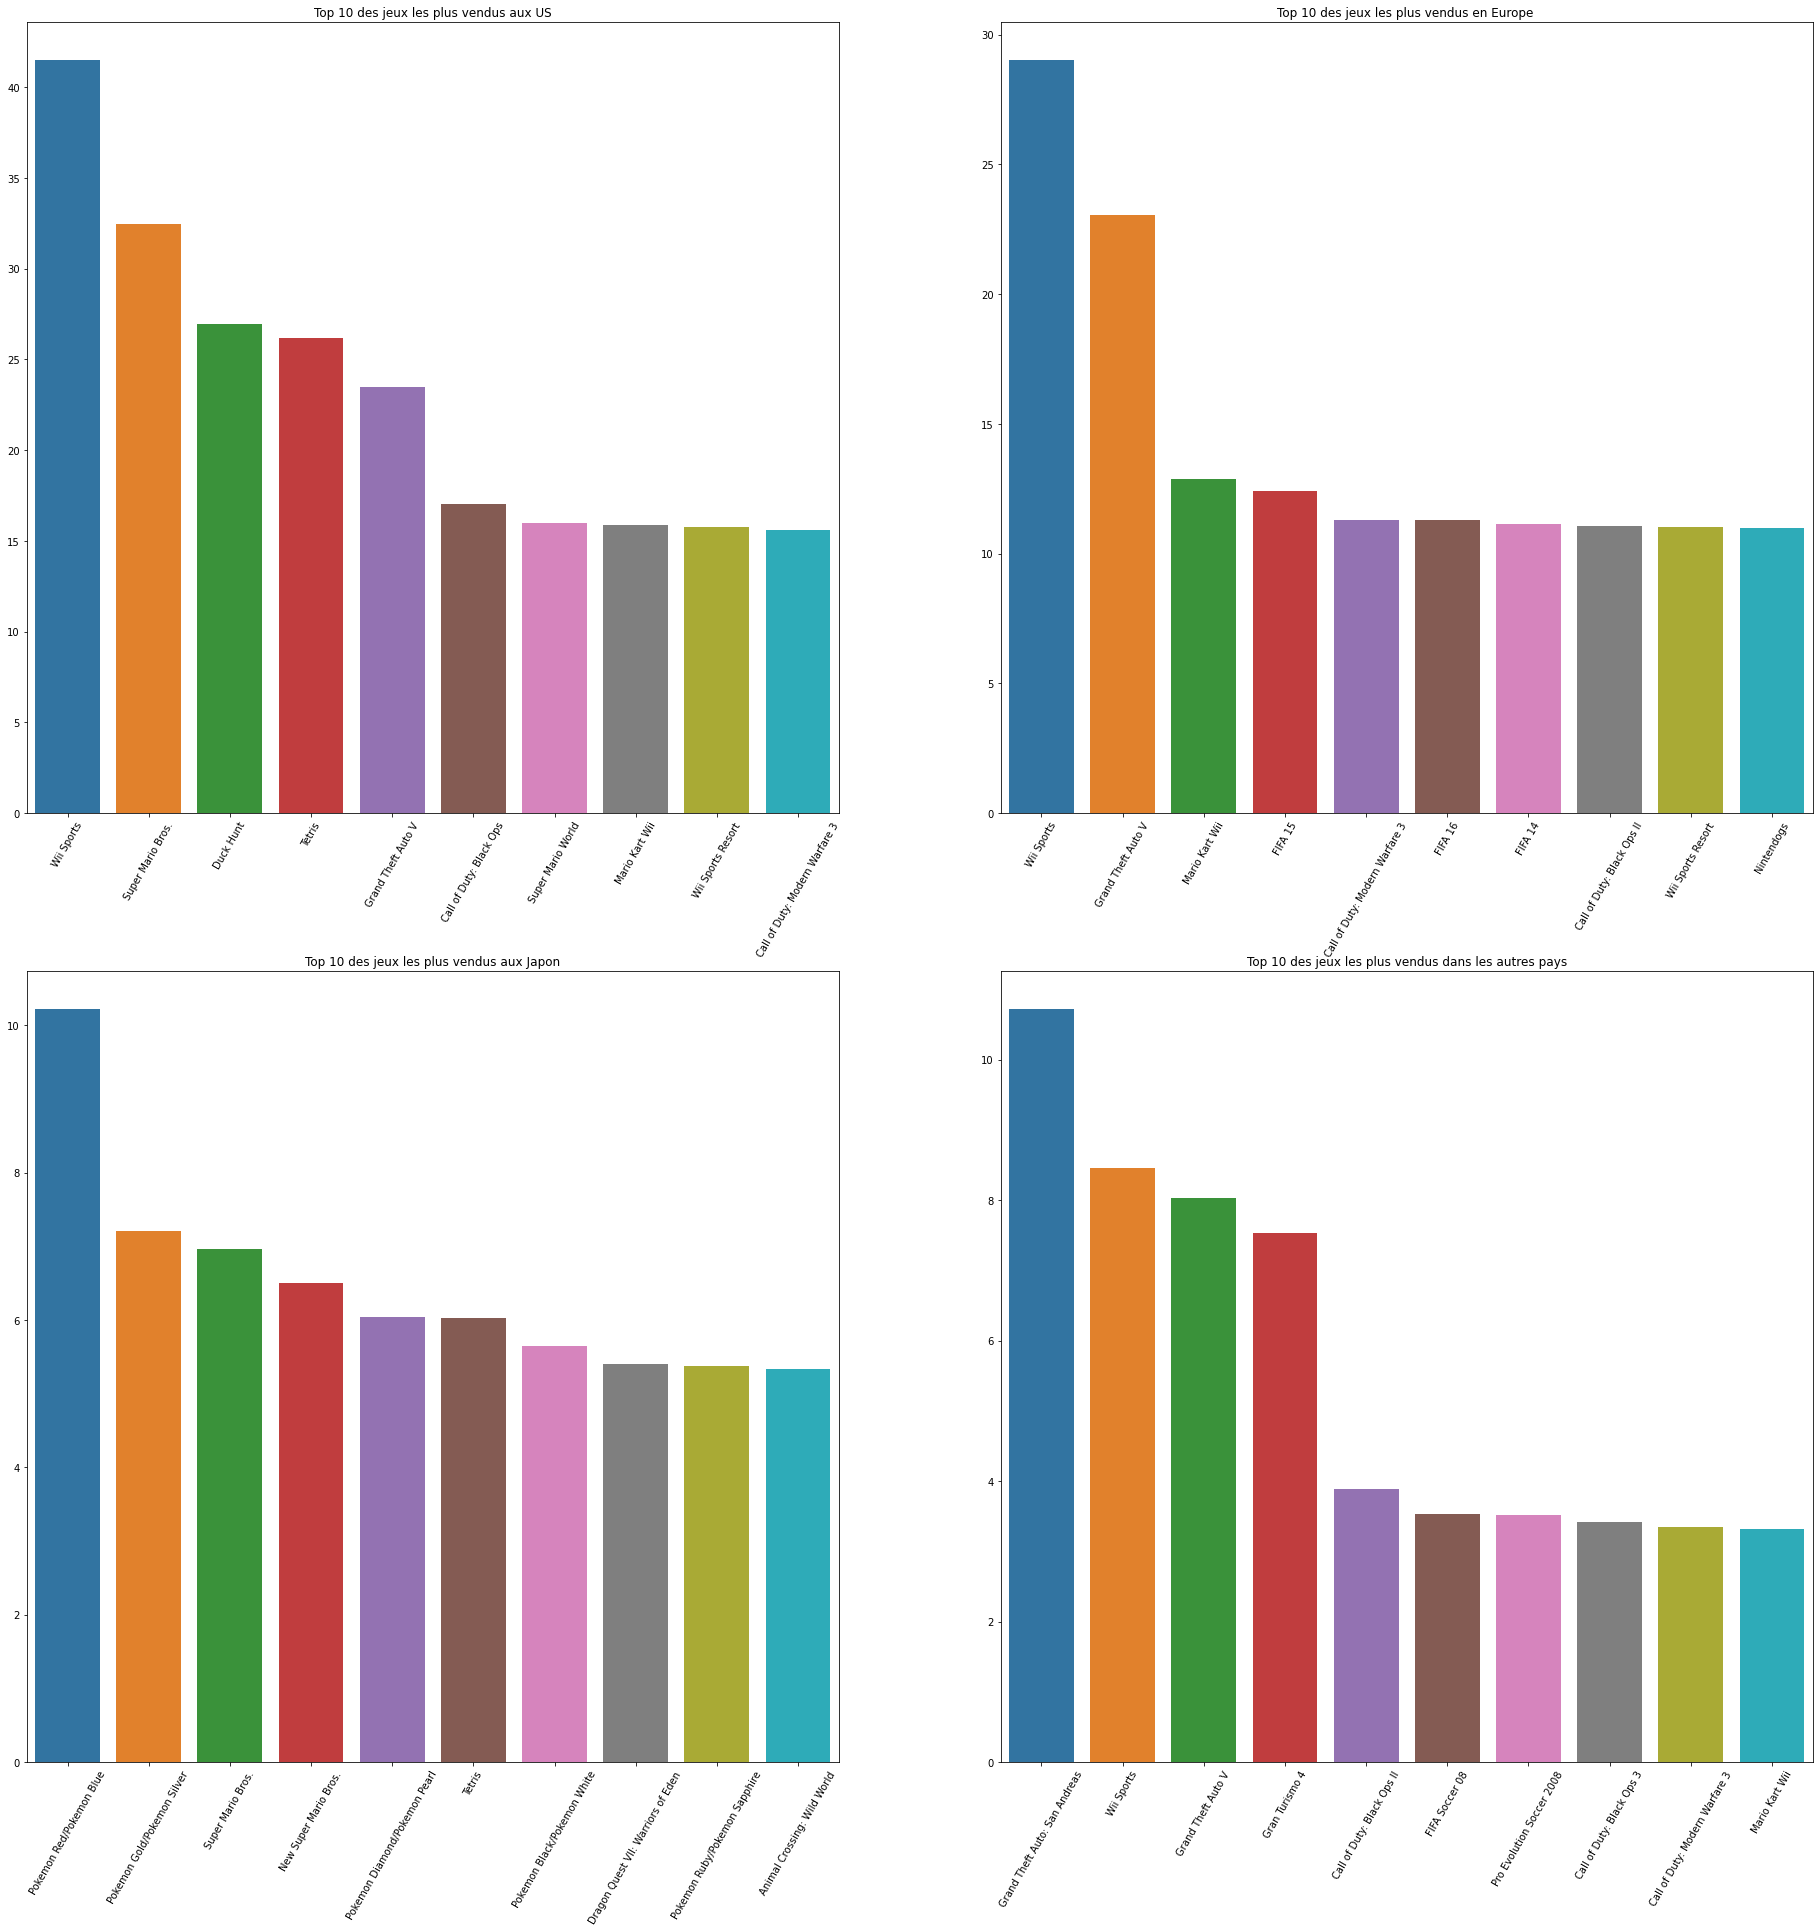

In [122]:
#On va comparer par 4 diagrammes en barre  les 10 jeux les plus vendus selon les parties du monde
best_usa_sales= df['NA_Sales'].groupby(df['Name']).sum().sort_values(ascending=False)
best_eu_sales= df['EU_Sales'].groupby(df['Name']).sum().sort_values(ascending=False)
best_japon_sales= df['JP_Sales'].groupby(df['Name']).sum().sort_values(ascending=False)
best_other_sales= df['Other_Sales'].groupby(df['Name']).sum().sort_values(ascending=False)
plt.figure(figsize=(32,32))
plt.subplot(221)
plt.xticks(rotation=60)
sns.barplot(x=best_usa_sales.head(10).index,
            y=best_usa_sales.head(10).values)
plt.title('Top 10 des jeux les plus vendus aux US')
plt.xlabel('');
plt.subplot(222)
plt.xticks(rotation=60)
sns.barplot(x=best_eu_sales.head(10).index,
            y=best_eu_sales.head(10).values)
plt.title('Top 10 des jeux les plus vendus en Europe ')
plt.xlabel('');
plt.subplot(223)
plt.xticks(rotation=60)
sns.barplot(x=best_japon_sales.head(10).index,
            y=best_japon_sales.head(10).values)
plt.title('Top 10 des jeux les plus vendus aux Japon')
plt.xlabel('');
plt.subplot(224)
plt.xticks(rotation=60)
sns.barplot(x=best_other_sales.head(10).index,
            y=best_other_sales.head(10).values)
plt.title('Top 10 des jeux les plus vendus dans les autres pays')
plt.xlabel('');

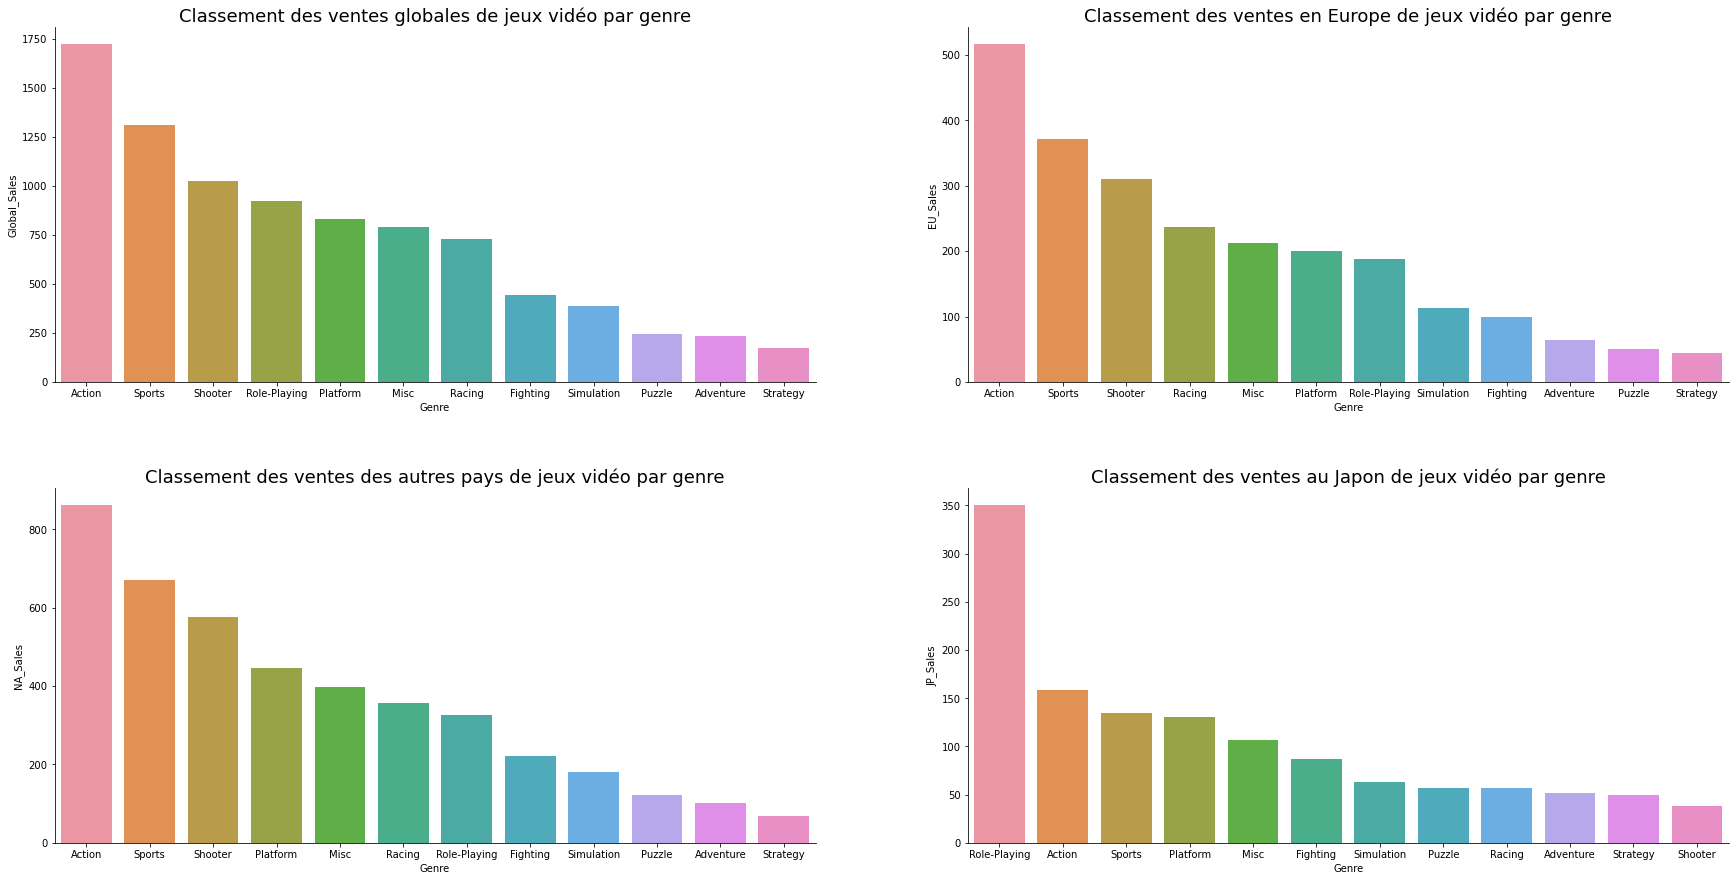

In [123]:
##On va comparer par 4 diagrammes en barre  les genres de jeux les plus vendus selon les continents
data_NA_Sales = df.groupby(by=['Genre'])['NA_Sales'].sum()
data_NA_Sales = data_NA_Sales.reset_index()
data_NA_Sales = data_NA_Sales.sort_values(by=['NA_Sales'], ascending=False)
data_EU_Sales = df.groupby(by=['Genre'])['EU_Sales'].sum()
data_EU_Sales = data_EU_Sales.reset_index()
data_EU_Sales = data_EU_Sales.sort_values(by=['EU_Sales'], ascending=False)
data_JP_Sales = df.groupby(by=['Genre'])['JP_Sales'].sum()
data_JP_Sales = data_JP_Sales.reset_index()
data_JP_Sales = data_JP_Sales.sort_values(by=['JP_Sales'], ascending=False)
data_platform = df.groupby(by=['Genre'])['Global_Sales'].sum()
data_platform = data_platform.reset_index()
data_platform = data_platform.sort_values(by=['Global_Sales'], ascending=False)
fig, axarr = plt.subplots(2, 2, figsize=(30, 15))
sns.barplot(x="Genre", y="Global_Sales", data=data_platform,
    ax=axarr[0][0])
plt.ylabel('Ventes globales')
axarr[0][0].set_title("Classement des ventes globales de jeux vidéo par genre", fontsize=18)
sns.barplot(x="Genre", y="NA_Sales", data=data_NA_Sales,
    ax=axarr[1][0])
axarr[1][0].set_title("Classement des ventes des autres pays de jeux vidéo par genre", fontsize=18)
sns.barplot(x="Genre", y="EU_Sales", data=data_EU_Sales,
    ax=axarr[0][1])
axarr[0][1].set_title("Classement des ventes en Europe de jeux vidéo par genre", fontsize=18)
sns.barplot(x="Genre", y="JP_Sales", data=data_JP_Sales,
    ax=axarr[1][1])
axarr[1][1].set_title("Classement des ventes au Japon de jeux vidéo par genre", fontsize=18)
plt.subplots_adjust(hspace=.3)

sns.despine()

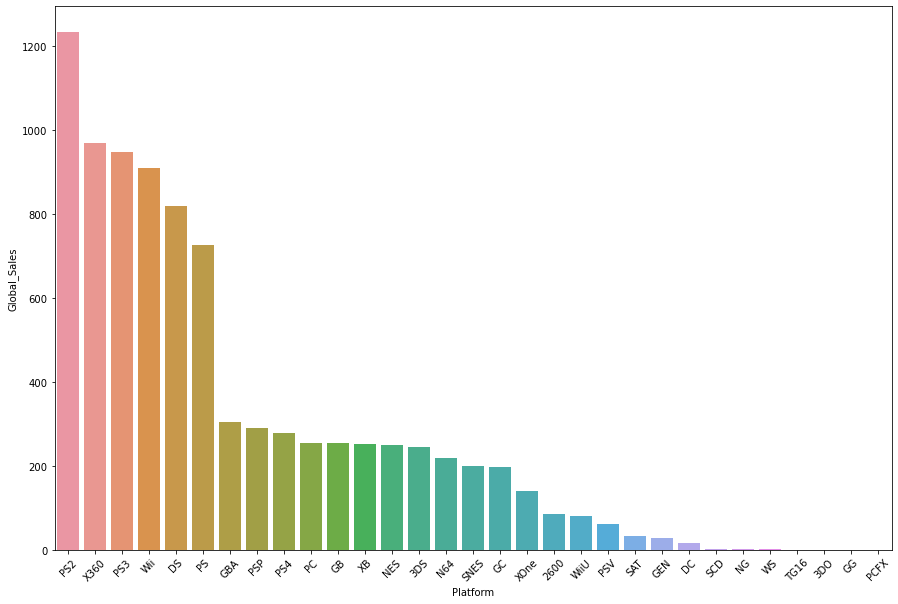

In [124]:
#Nous allons afficher les ventes mondiales suivant la console
platform = df.groupby(by=["Platform"])["Global_Sales"].sum()
platform = platform.reset_index()
platform = platform.sort_values(by=["Global_Sales"], ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x="Platform", y="Global_Sales", data=platform)
plt.xticks(rotation=45)
plt.show()

In [125]:
#On va créer une colonne marque qui va reprendres les marques des différentes consoles afin de pouvoir les représenter graphiquement
Platform_gr = {'Wii':'Nintendo','NES':'Nintendo','GB':'Nintendo','DS':'Nintendo','X360':'Microsoft','PS3':'Sony',
               'PS2':'Sony','SNES':'Nintendo','GBA':'Nintendo','3DS':'Nintendo','PS4':'Sony','N64':'Nintendo','PS':'Sony',
               'XB':'Microsoft', '2600':'Misc', 'PSP':'Sony', 'XOne':'Microsoft','GC':'Nintendo', 'WiiU':'Nintendo',
               'GEN':'Sega','DC':'Sega','PSV':'Sony','SAT':'Sega','SCD':'Sega','WS':'Misc','NG':'Misc','TG16':'Misc',
               '3DO':'Misc','GG':'Sega','PCFX':'Misc'}
df["Marque"]=df["Platform"].replace(Platform_gr)

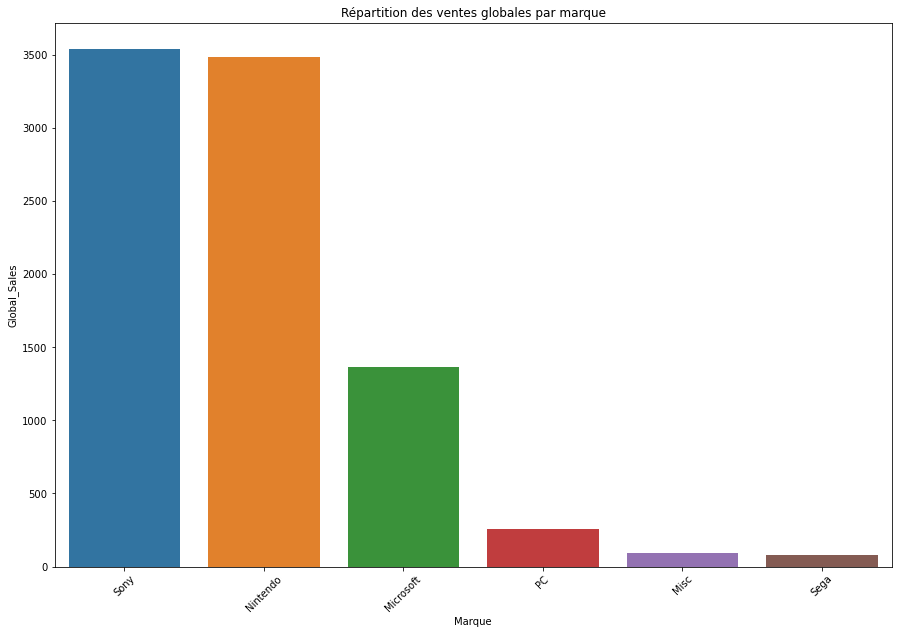

In [126]:
#On représente grâce à cette nouvelle colonne les ventes globales selon les différentes marques 
platform = df.groupby(by=["Marque"])["Global_Sales"].sum()
platform = platform.reset_index()
platform = platform.sort_values(by=["Global_Sales"], ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x="Marque", y="Global_Sales", data=platform)
plt.xticks(rotation=45)
plt.title("Répartition des ventes globales par marque")
plt.show()

In [127]:
#  On mesure le niveau de corrélation entre les variables qualitatives. 

table=pd.crosstab(df['Name'],df['Platform'])
table2=pd.crosstab(df['Genre'],df['Platform'])
table3=pd.crosstab(df['Publisher'],df['Platform'])
table4=pd.crosstab(df['Publisher'],df['Genre'])
table5=pd.crosstab(df['Publisher'],df['Name'])
table6=pd.crosstab(df['Name'],df['Genre'])

resultats_test = chi2_contingency(table)


def V_Cramer (table,N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

print('La corrélation entre la table Name et Platform est de :',V_Cramer(table,df.shape[0]))
print('La corrélation entre la table Genre et Platform est de :',V_Cramer(table2,df.shape[0]))
print('La corrélation entre la table Publisher et Platform est de :',V_Cramer(table3,df.shape[0]))
print('La corrélation entre la table Publisher et Genre est de :',V_Cramer(table4,df.shape[0]))
print('La corrélation entre la table Publisher et Name est de :',V_Cramer(table5,df.shape[0]))
print('La corrélation entre la table Name et Genre est de :',V_Cramer(table6,df.shape[0]))

La corrélation entre la table Name et Platform est de : 0.2592828608397948
La corrélation entre la table Genre et Platform est de : 0.1753670652281396
La corrélation entre la table Publisher et Platform est de : 0.3383589231226903
La corrélation entre la table Publisher et Genre est de : 0.3251960209112154
La corrélation entre la table Publisher et Name est de : 0.5193495121631215
La corrélation entre la table Name et Genre est de : 0.5519999137079395


In [128]:
#On vérifie le nombre de jeux par éditeurs ainsi que le nombre d'occurence
df.Publisher.value_counts()

Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          917
Konami Digital Entertainment     823
                                ... 
inXile Entertainment               1
Detn8 Games                        1
Axela                              1
SCS Software                       1
Havas Interactive                  1
Name: Publisher, Length: 576, dtype: int64

In [129]:
#Publisher a 576 modalités différentes. On gardera que les modalités des 10 éditeurs qui ont le plus de ventes
df_sorted = df.groupby(by=["Publisher"])["Global_Sales"].sum()
df_sorted = df_sorted.reset_index()
df_sorted = df_sorted.sort_values(by=["Global_Sales"], ascending=False)

df_sorted["Publisher"].head(10)


359                        Nintendo
138                 Electronic Arts
21                       Activision
455     Sony Computer Entertainment
524                         Ubisoft
493            Take-Two Interactive
487                             THQ
275    Konami Digital Entertainment
445                            Sega
347              Namco Bandai Games
Name: Publisher, dtype: object

In [130]:
#Création d'une variable regroupée contenant les 10 éditeurs qui ont le plus de ventes et une modalité Autres
df['Publisher_gr']=df['Publisher']
df.loc[(df['Publisher'] != 'Nintendo') & (df['Publisher'] !='Electronic Arts')& (df['Publisher'] !='Activision')
       & (df['Publisher'] !='Sony Computer Entertainment')& (df['Publisher'] !='Ubisoft')& 
       (df['Publisher'] !='Take-Two Interactive') & (df['Publisher'] !='THQ') &
       (df['Publisher'] !='Konami Digital Entertainment')& (df['Publisher'] !='Sega') & 
       (df['Publisher'] !='Namco Bandai Games'),'Publisher_gr']= "Autres"
                    
df.Publisher_gr.value_counts()

Autres                          8182
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          917
Konami Digital Entertainment     823
THQ                              712
Nintendo                         696
Sony Computer Entertainment      682
Sega                             630
Take-Two Interactive             412
Name: Publisher_gr, dtype: int64

In [131]:
df.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Marque,Publisher_gr
Rank,,,,,,,,,,,,
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.0,0.0,0.01,Nintendo,Autres
16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01,Nintendo,Autres
16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.0,0.0,0.01,Sony,Activision
16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01,Nintendo,Autres
16600,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01,Nintendo,Autres


In [132]:
#Transformation des variables catégorielles en variables numériques
df = df.join(pd.get_dummies(df['Genre'], prefix='Genre'))
df = df.join(pd.get_dummies(df['Platform'], prefix='Platform'))
df = df.join(pd.get_dummies(df['Publisher_gr'], prefix='Publi'))
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Publi_Autres,Publi_Electronic Arts,Publi_Konami Digital Entertainment,Publi_Namco Bandai Games,Publi_Nintendo,Publi_Sega,Publi_Sony Computer Entertainment,Publi_THQ,Publi_Take-Two Interactive,Publi_Ubisoft
Rank,,,,,,,,,,,,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,...,0,0,0,0,1,0,0,0,0,0
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,...,0,0,0,0,1,0,0,0,0,0
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,...,0,0,0,0,1,0,0,0,0,0
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,...,0,0,0,0,1,0,0,0,0,0
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,...,0,0,0,0,1,0,0,0,0,0


In [133]:
#On va enlever les colonnes qui ne sont plus nécessaire suite à la transformation en variable numérique ainsi que les colonnes Targets
data=df.drop(['Name', 'Platform','Genre','Marque','Publisher_gr','Publisher','Global_Sales', 'NA_Sales','JP_Sales','EU_Sales','Other_Sales'],axis=1)
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16287 entries, 1 to 16600
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Year                                16287 non-null  int32
 1   Genre_Action                        16287 non-null  uint8
 2   Genre_Adventure                     16287 non-null  uint8
 3   Genre_Fighting                      16287 non-null  uint8
 4   Genre_Misc                          16287 non-null  uint8
 5   Genre_Platform                      16287 non-null  uint8
 6   Genre_Puzzle                        16287 non-null  uint8
 7   Genre_Racing                        16287 non-null  uint8
 8   Genre_Role-Playing                  16287 non-null  uint8
 9   Genre_Shooter                       16287 non-null  uint8
 10  Genre_Simulation                    16287 non-null  uint8
 11  Genre_Sports                        16287 non-null  uint8
 12  Genr

In [134]:
#On sépare le jeu de données entre les données test et train sur la target Global Sales
#Puis on effectue différents tests de modélisation
X_train, X_test, y_train, y_test = train_test_split(data, df.Global_Sales, test_size=0.2,random_state=1)

LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
LR_MAE=mean_absolute_error(y_test,y_pred)
LR_MSE=mean_squared_error(y_test,y_pred)
LR_r2=r2_score(y_test,y_pred)

svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
svr_MAE=mean_absolute_error(y_test,y_pred)
svr_MSE=mean_squared_error(y_test,y_pred)
svr_r2=r2_score(y_test,y_pred)

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
y_pred = knr.predict(X_test)
knr_MAE=mean_absolute_error(y_test,y_pred)
knr_MSE=mean_squared_error(y_test,y_pred)
knr_r2=r2_score(y_test,y_pred)

ridge_reg=RidgeCV(alphas=(0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)
ridge_reg_MAE=mean_absolute_error(y_test,y_pred)
ridge_reg_MSE=mean_squared_error(y_test,y_pred)
ridge_reg_r2=r2_score(y_test,y_pred)

model_lasso = LassoCV(cv=10).fit(X_train, y_train)
y_pred = model_lasso.predict(X_test)
model_lasso_MAE=mean_absolute_error(y_test,y_pred)
model_lasso_MSE=mean_squared_error(y_test,y_pred)
model_lasso_r2=r2_score(y_test,y_pred)

In [135]:
#On crée un DataFrame reprenant l'ensemble des scores des différentes algorithmes
tableau_metrics = pd.DataFrame({"Model":['Linear Regression','SVR','KNeighborsRegressor','Ridge', 'Lasso'],
                      "MAE":[ LR_MAE, svr_MAE,knr_MAE, ridge_reg_MAE, model_lasso_MAE],
                          "MSE":[ LR_MSE, svr_MSE,knr_MSE, ridge_reg_MSE, model_lasso_MSE],
                              "R²":[ LR_r2, svr_r2,knr_r2, ridge_reg_r2, model_lasso_r2] })
tableau_metrics

,Model,MAE,MSE,R²
0,Linear Regression,0.545427,1.784068,0.126352
1,SVR,0.470394,2.153738,-0.054673
2,KNeighborsRegressor,0.542308,2.212016,-0.083212
3,Ridge,0.542662,1.783362,0.126698
4,Lasso,0.540555,1.787430,0.124705


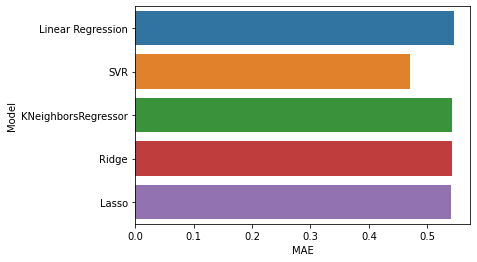

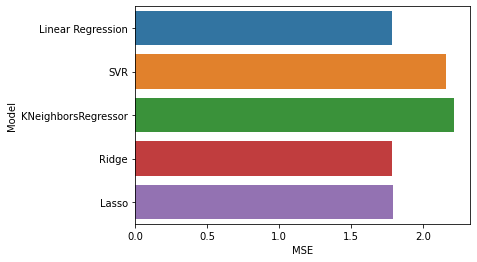

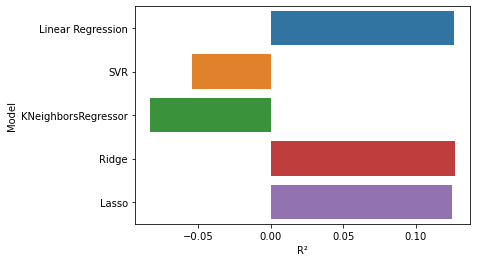

In [136]:
#On représente ces scores sous forme de barplot pour une présentation plus efficace
sns.barplot(x='MAE', y='Model', data=tableau_metrics);
plt.show()

sns.barplot(x='MSE', y='Model', data=tableau_metrics);
plt.show()

sns.barplot(x='R²', y='Model', data=tableau_metrics);
plt.show()

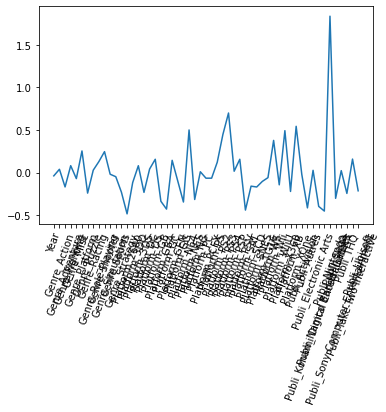

<Figure size 1440x1080 with 0 Axes>

In [137]:
#On retient le modèle Ridge parce qu'il a le score le plus haut et on observe ces coefficients
plt.plot(range(len(data.columns)),ridge_reg.coef_)
plt.xticks(range(len(data.columns)), data.columns.values, rotation=70)
plt.figure(figsize=(20,15));

In [138]:
#On présente ces coefficient dans un Dataframe pour plus de lisibilité en les classant par ordre décroissant
tableau_coef = pd.DataFrame({"Variable":data.columns.values,
                      "Coef":ridge_reg.coef_})
tableau_coef.sort_values('Coef',ascending=False)

,Variable,Coef
49,Publi_Nintendo,1.833145
31,Platform_PS4,0.698281
43,Platform_XOne,0.542403
24,Platform_NES,0.499694
41,Platform_X360,0.491518
30,Platform_PS3,0.446247
39,Platform_Wii,0.377169
5,Genre_Platform,0.253522
9,Genre_Shooter,0.245617
53,Publi_Take-Two Interactive,0.158332


In [139]:
#On effectue les mêmes tests avec les ventes au Japon puisque l'on a observé un comportement atypique là bas
#On sépare le jeu de données entre les données test et train sur la target Japan Sales
X_train, X_test, y_train, y_test = train_test_split(data, df.JP_Sales, test_size=0.20,random_state=1)

LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
LR_MAE=mean_absolute_error(y_test,y_pred)
LR_MSE=mean_squared_error(y_test,y_pred)
LR_r2=r2_score(y_test,y_pred)

svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
svr_MAE=mean_absolute_error(y_test,y_pred)
svr_MSE=mean_squared_error(y_test,y_pred)
svr_r2=r2_score(y_test,y_pred)

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
y_pred = knr.predict(X_test)
knr_MAE=mean_absolute_error(y_test,y_pred)
knr_MSE=mean_squared_error(y_test,y_pred)
knr_r2=r2_score(y_test,y_pred)

ridge_reg=RidgeCV(alphas=(0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)
ridge_reg_MAE=mean_absolute_error(y_test,y_pred)
ridge_reg_MSE=mean_squared_error(y_test,y_pred)
ridge_reg_r2=r2_score(y_test,y_pred)

model_lasso = LassoCV(cv=10).fit(X_train, y_train)
y_pred = model_lasso.predict(X_test)
model_lasso_MAE=mean_absolute_error(y_test,y_pred)
model_lasso_MSE=mean_squared_error(y_test,y_pred)
model_lasso_r2=r2_score(y_test,y_pred)

In [140]:
#On crée un DataFrame reprenant l'ensemble des scores des différentes algorithmes
tableau_metrics = pd.DataFrame({"Model":['Linear Regression','SVR','KNeighborsRegressor','Ridge', 'Lasso'],
                      "MAE":[ LR_MAE, svr_MAE,knr_MAE, ridge_reg_MAE, model_lasso_MAE],
                          "MSE":[ LR_MSE, svr_MSE,knr_MSE, ridge_reg_MSE, model_lasso_MSE],
                              "R²":[ LR_r2, svr_r2,knr_r2, ridge_reg_r2, model_lasso_r2] })
tableau_metrics

,Model,MAE,MSE,R²
0,Linear Regression,0.090611,0.076259,0.250234
1,SVR,0.126105,0.102334,-0.006132
2,KNeighborsRegressor,0.085152,0.089284,0.122174
3,Ridge,0.090611,0.076286,0.249970
4,Lasso,0.088934,0.076599,0.246897


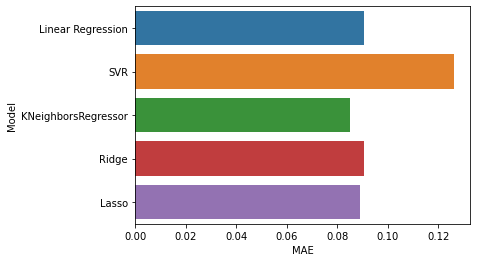

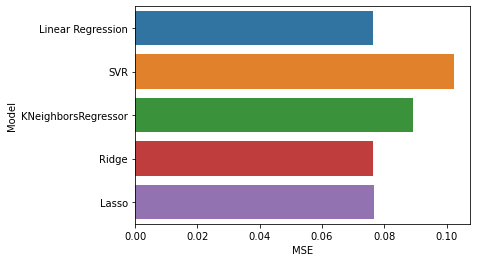

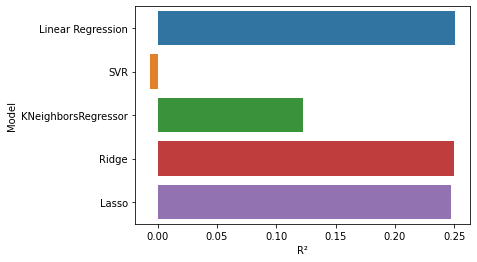

In [141]:
#On représente ces scores sous forme de barplot pour une présentation plus efficace
sns.barplot(x='MAE', y='Model', data=tableau_metrics);
plt.show()

sns.barplot(x='MSE', y='Model', data=tableau_metrics);
plt.show()

sns.barplot(x='R²', y='Model', data=tableau_metrics);
plt.show()

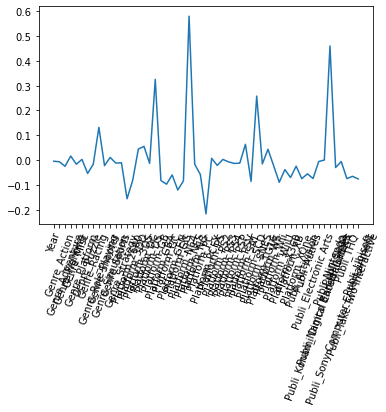

<Figure size 1440x1080 with 0 Axes>

In [142]:
#On retient le modèle de régression linéaire parce qu'il a le score le plus haut et on observe ces coefficients
plt.plot(range(len(data.columns)),LR.coef_)
plt.xticks(range(len(data.columns)), data.columns.values, rotation=70)
plt.figure(figsize=(20,15));

In [143]:
#De nouveau on présentera les coef dans le dataFrame classé par ordre décroissant
tableau_coef2 = pd.DataFrame({"Variable":data.columns.values,
                      "Coef":LR.coef_})
tableau_coef2.sort_values('Coef',ascending=False)

,Variable,Coef
24,Platform_NES,0.579497
49,Publi_Nintendo,0.459632
18,Platform_GB,0.325138
36,Platform_SNES,0.257876
8,Genre_Role-Playing,0.132011
34,Platform_SAT,0.063663
16,Platform_DC,0.055348
15,Platform_3DS,0.044469
38,Platform_WS,0.043749
3,Genre_Fighting,0.016499


In [144]:
#On scap les  188 pages du site Metacritic
"""""
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import requests
headers = {'User-Agent': 'Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)'}
titres_MC = []
plateforme_MC = []
sortie_MC=[]
note_MC= []
avis_MC= []
pages = np.arange(0, 188)
for page in pages:
    response = requests.get("https://www.metacritic.com/browse/games/score/metascore/all/all/filtered?page=" + str(page) , headers=headers)
    html = response.content
    soup = BeautifulSoup(html, 'html.parser')
    for a in soup.find_all("a", {"class":"title"}):
        titres_MC.append(a.text)
    for b in soup.select('.platform .data'):
        plateforme_MC.append(b.text.strip("\n, "))
    for c in soup.select('.platform+ span'):
        sortie_MC.append(c.text.strip("\n, "))
    for d in soup.select('.clamp-metascore .positive,.clamp-metascore .mixed,.clamp-metascore .negative'):
        note_MC.append(d.text)
    for e in soup.select('.summary'):
        avis_MC.append(e.text.strip("\n, "))"""

'""\nfrom bs4 import BeautifulSoup\nfrom urllib.request import Request, urlopen\nimport requests\nheaders = {\'User-Agent\': \'Mozilla/5.0 (compatible; Googlebot/2.1; +http://www.google.com/bot.html)\'}\ntitres_MC = []\nplateforme_MC = []\nsortie_MC=[]\nnote_MC= []\navis_MC= []\npages = np.arange(0, 188)\nfor page in pages:\n    response = requests.get("https://www.metacritic.com/browse/games/score/metascore/all/all/filtered?page=" + str(page) , headers=headers)\n    html = response.content\n    soup = BeautifulSoup(html, \'html.parser\')\n    for a in soup.find_all("a", {"class":"title"}):\n        titres_MC.append(a.text)\n    for b in soup.select(\'.platform .data\'):\n        plateforme_MC.append(b.text.strip("\n, "))\n    for c in soup.select(\'.platform+ span\'):\n        sortie_MC.append(c.text.strip("\n, "))\n    for d in soup.select(\'.clamp-metascore .positive,.clamp-metascore .mixed,.clamp-metascore .negative\'):\n        note_MC.append(d.text)\n    for e in soup.select(\'.s

In [145]:
#On enregistre les données scrappées car les résultats du site ne sont pas stables
""""f = open("scrap.saved","wb")
pickle.dump(titres_MC,f)
pickle.dump(plateforme_MC,f)
pickle.dump(sortie_MC,f)
pickle.dump(note_MC,f)
pickle.dump(avis_MC,f)
f.close()"""""

'"f = open("scrap.saved","wb")\npickle.dump(titres_MC,f)\npickle.dump(plateforme_MC,f)\npickle.dump(sortie_MC,f)\npickle.dump(note_MC,f)\npickle.dump(avis_MC,f)\nf.close()'

In [146]:
#On importe le fichier enregistré afin que nous ayons toujours le même nombres de résultats
file = open('scrap.saved', 'rb')
titres_MC = pickle.load(file)
plateforme_MC = pickle.load(file)
sortie_MC = pickle.load(file)
note_MC = pickle.load(file)
avis_MC = pickle.load(file)
file.close()

In [147]:
#On fait la vérification du nombre d'occurence par ligne
print(len(titres_MC))
print(len(sortie_MC))
print(len(plateforme_MC))
print(len(avis_MC))
print(len(note_MC))

18800
18800
18800
18800
18800


In [148]:
#On crée un dataframe des données scrappés
Metacritic = pd.DataFrame(list(zip(titres_MC,note_MC,plateforme_MC,sortie_MC,avis_MC)), columns=["Name","Note_meta","Platform","Date_sortie","Avis"])
Metacritic.tail()

,Name,Note_meta,Platform,Date_sortie,Avis
18795,Giana Sisters: Dream Runners,32,Xbox One,"August 19, 2015","In Giana Sisters: Dream Runners, Giana compete..."
18796,Best of Tests DS,32,DS,"March 4, 2008","Logic, observation, memory, speed of perceptio..."
18797,The Walking Dead: Survival Instinct,32,Xbox 360,"March 19, 2013",Terminal Reality’s The Walking Dead video game...
18798,New World Order,32,PC,"March 18, 2003","In the near future, terrorist factions known a..."
18799,The Expendables 2 Videogame,32,Xbox 360,"August 17, 2012",Building on the universe created in the high-o...


In [149]:
#On vérifie le type de données du nouveau DataFrame
Metacritic.dtypes

Name           object
Note_meta      object
Platform       object
Date_sortie    object
Avis           object
dtype: object

In [150]:
#On va séparer les notes en 3 groupes différents. En effet lors du scapping les notes étaient regroupaient en 3 catégories : positive, mixed et négative. On va donc respecter cette distinction dans notre code. 
Metacritic["Note_meta"]=Metacritic["Note_meta"].astype('int')
Metacritic.loc[Metacritic['Note_meta'] >=75, 'Sentiments'] = 1
Metacritic.loc[(Metacritic['Note_meta'] <75) & (Metacritic['Note_meta']>=50), 'Sentiments'] = 2
Metacritic.loc[Metacritic['Note_meta'] <50, 'Sentiments'] = 3
Metacritic["Sentiments"]=Metacritic["Sentiments"].astype('int')
Metacritic['Sentiments'].value_counts()

2    9700
1    8002
3    1098
Name: Sentiments, dtype: int64

In [151]:
#Transformation de nom de plateforme du site pour pouvoir faire la fusion dans le dataset
new_platform={'PlayStation 4':"PS4",
              'Xbox 360':"X360",
              'PlayStation 2':"PS2",
              'PlayStation 3':"PS3",
              'Xbox One':"XOne",
              'Xbox':"XB",
              'GameCube':"GC",
              'Game Boy Advance':"GBA",
              'PlayStation Vita':"PSV",
              'PlayStation':"PS",
              'Wii U':"WiiU",
             'Dreamcast' : "DC",
             'Nintendo 64':"N64"}

Metacritic['Platform']=Metacritic['Platform'].replace(new_platform)

In [152]:
#On fusionne notre fichier scrappé avec le fichier pré parer sur la colonne Name et Platform
fusion=pd.merge(df,Metacritic, on=["Name","Platform"], how="inner")
fusion.tail()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Publi_Nintendo,Publi_Sega,Publi_Sony Computer Entertainment,Publi_THQ,Publi_Take-Two Interactive,Publi_Ubisoft,Note_meta,Date_sortie,Avis,Sentiments
6795,Mortal Kombat: Deadly Alliance,GBA,2002,Fighting,Midway Games,0.01,0.00,0.0,0.0,0.01,...,0,0,0,0,0,0,81,"November 20, 2002",A controversial franchise marks its return in ...,1
6796,Damnation,PC,2009,Shooter,Codemasters,0.00,0.01,0.0,0.0,0.01,...,0,0,0,0,0,0,41,"May 22, 2009",Evolving the shooter genre with its unique com...,3
6797,PGA European Tour,N64,2000,Sports,Infogrames,0.01,0.00,0.0,0.0,0.01,...,0,0,0,0,0,0,58,"June 15, 2000","Realism, Authenticity, Sophistication and a Eu...",2
6798,Planet Monsters,GBA,2001,Action,Titus,0.01,0.00,0.0,0.0,0.01,...,0,0,0,0,0,0,67,"December 6, 2001",Planet Monsters doesn't bring much to this alr...,2
6799,Mega Brain Boost,DS,2008,Puzzle,Majesco Entertainment,0.01,0.00,0.0,0.0,0.01,...,0,0,0,0,0,0,48,"January 22, 2008",Get three full brain games on 1 game cartridge...,3


In [153]:
#On prend les info du DataFrame fusion
fusion.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6800 entries, 0 to 6799
Data columns (total 70 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name                                6800 non-null   object 
 1   Platform                            6800 non-null   object 
 2   Year                                6800 non-null   int32  
 3   Genre                               6800 non-null   object 
 4   Publisher                           6800 non-null   object 
 5   NA_Sales                            6800 non-null   float64
 6   EU_Sales                            6800 non-null   float64
 7   JP_Sales                            6800 non-null   float64
 8   Other_Sales                         6800 non-null   float64
 9   Global_Sales                        6800 non-null   float64
 10  Marque                              6800 non-null   object 
 11  Publisher_gr                        6800 no

C:\Users\Thomas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Thomas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Thomas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


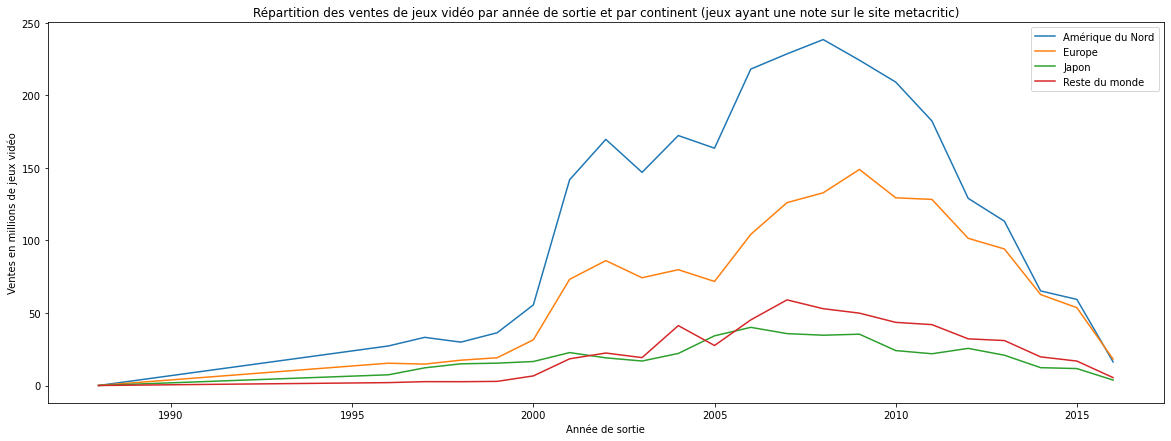

In [154]:
#On reprend le précédent graphique du nombre de jeux par continent mais cette fois en prenant les données récoupées de la fusion ce qui baisse le nombre d'occurences.
Annual_sales_fusion= fusion.groupby('Year')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()
plt.figure(figsize=(20,7))
plt.title('Répartition des ventes de jeux vidéo par année de sortie et par continent (jeux ayant une note sur le site metacritic)')
sns.lineplot(x=Annual_sales_fusion['Year'], y=Annual_sales_fusion["NA_Sales"], label="Amérique du Nord")
sns.lineplot(Annual_sales_fusion['Year'], Annual_sales_fusion["EU_Sales"], label="Europe")
sns.lineplot(Annual_sales_fusion['Year'], Annual_sales_fusion["JP_Sales"], label="Japon")
sns.lineplot(Annual_sales_fusion['Year'], Annual_sales_fusion["Other_Sales"], label="Reste du monde")
plt.ylabel('Ventes en millions de jeux vidéo')
plt.xlabel('Année de sortie');

In [155]:
#De la même manière nous enlevons les colonnes non-nécessaires dans la sélection des features
fusion_data=fusion.drop(['Platform','Genre','Publisher','Publisher_gr','Marque','Avis','Sentiments','Name','Global_Sales','Date_sortie','NA_Sales','EU_Sales','JP_Sales','Other_Sales'],axis=1)
fusion_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6800 entries, 0 to 6799
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Year                                6800 non-null   int32
 1   Genre_Action                        6800 non-null   uint8
 2   Genre_Adventure                     6800 non-null   uint8
 3   Genre_Fighting                      6800 non-null   uint8
 4   Genre_Misc                          6800 non-null   uint8
 5   Genre_Platform                      6800 non-null   uint8
 6   Genre_Puzzle                        6800 non-null   uint8
 7   Genre_Racing                        6800 non-null   uint8
 8   Genre_Role-Playing                  6800 non-null   uint8
 9   Genre_Shooter                       6800 non-null   uint8
 10  Genre_Simulation                    6800 non-null   uint8
 11  Genre_Sports                        6800 non-null   uint8
 12  Genre_

In [156]:
#On affiche l'analyse descriptive des colonnes numériques du DataFrame fusion_data
fusion_data.describe()

,Year,Genre_Action,Genre_Adventure,Genre_Fighting,Genre_Misc,Genre_Platform,Genre_Puzzle,Genre_Racing,Genre_Role-Playing,Genre_Shooter,...,Publi_Electronic Arts,Publi_Konami Digital Entertainment,Publi_Namco Bandai Games,Publi_Nintendo,Publi_Sega,Publi_Sony Computer Entertainment,Publi_THQ,Publi_Take-Two Interactive,Publi_Ubisoft,Note_meta
count,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,...,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000,6800.000000
mean,2006.933529,0.224706,0.037941,0.052059,0.059853,0.062647,0.027206,0.086471,0.100735,0.118824,...,0.128088,0.040441,0.033824,0.048676,0.046029,0.049853,0.045735,0.038824,0.063235,70.652941
std,4.128256,0.417419,0.191068,0.222162,0.237232,0.242345,0.162695,0.281078,0.301000,0.323605,...,0.334213,0.197006,0.180788,0.215207,0.209564,0.217657,0.208926,0.193188,0.243404,12.879480
min,1988.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000
50%,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.000000
75%,2010.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.000000
max,2016.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.000000


In [157]:
#On sépare le jeu de donnée entre les données test et train sur la target Global Sales afin de tester si les quelques colonnes scrappées peuvent améliorer le modèle
X_train, X_test, y_train, y_test = train_test_split(fusion_data, fusion.Global_Sales, test_size=0.2,random_state=1)

LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
LR_MAE=mean_absolute_error(y_test,y_pred)
LR_MSE=mean_squared_error(y_test,y_pred)
LR_r2=r2_score(y_test,y_pred)

svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
svr_MAE=mean_absolute_error(y_test,y_pred)
svr_MSE=mean_squared_error(y_test,y_pred)
svr_r2=r2_score(y_test,y_pred)

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
y_pred = knr.predict(X_test)
knr_MAE=mean_absolute_error(y_test,y_pred)
knr_MSE=mean_squared_error(y_test,y_pred)
knr_r2=r2_score(y_test,y_pred)

ridge_reg=RidgeCV(alphas=(0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)
ridge_reg_MAE=mean_absolute_error(y_test,y_pred)
ridge_reg_MSE=mean_squared_error(y_test,y_pred)
ridge_reg_r2=r2_score(y_test,y_pred)

model_lasso = LassoCV(cv=10).fit(X_train, y_train)
y_pred = model_lasso.predict(X_test)
model_lasso_MAE=mean_absolute_error(y_test,y_pred)
model_lasso_MSE=mean_squared_error(y_test,y_pred)
model_lasso_r2=r2_score(y_test,y_pred)

In [158]:
#On crée un DataFrame reprenant l'ensemble des scores des différentes algorithmes
tableau_metrics = pd.DataFrame({"Model":['Linear Regression','SVR','KNeighborsRegressor','Ridge', 'Lasso'],
                      "MAE":[ LR_MAE, svr_MAE,knr_MAE, ridge_reg_MAE, model_lasso_MAE],
                          "MSE":[ LR_MSE, svr_MSE,knr_MSE, ridge_reg_MSE, model_lasso_MSE],
                              "R²":[ LR_r2, svr_r2,knr_r2, ridge_reg_r2, model_lasso_r2] })
tableau_metrics

,Model,MAE,MSE,R²
0,Linear Regression,0.728375,1.776973,0.154255
1,SVR,0.557359,2.184204,-0.039565
2,KNeighborsRegressor,0.622269,2.140459,-0.018745
3,Ridge,0.723497,1.770679,0.157251
4,Lasso,0.704699,1.772677,0.156300


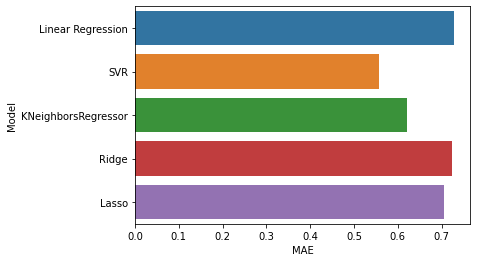

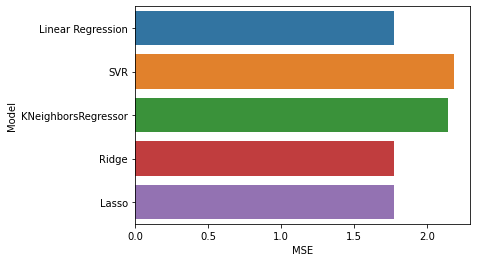

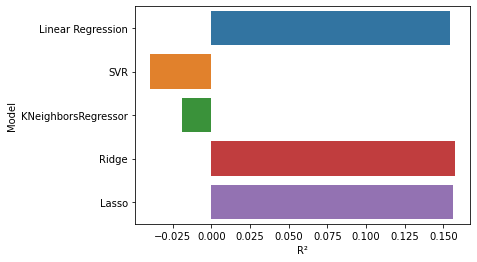

In [159]:
#On représente ces scores sous forme de barplot pour une présentation plus efficace
sns.barplot(x='MAE', y='Model', data=tableau_metrics);
plt.show()

sns.barplot(x='MSE', y='Model', data=tableau_metrics);
plt.show()

sns.barplot(x='R²', y='Model', data=tableau_metrics);
plt.show()

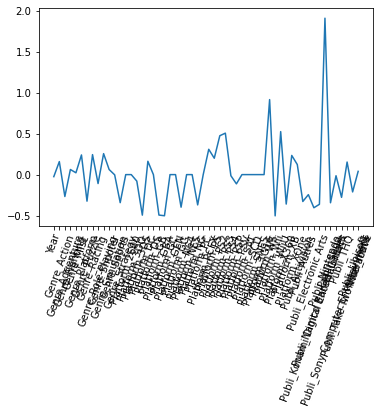

<Figure size 1224x504 with 0 Axes>

In [160]:
#On retient le modèle Ridge parce qu'il a le score le plus haut et on observe ces coefficients
plt.plot(range(len(fusion_data.columns)),ridge_reg.coef_)
plt.xticks(range(len(fusion_data.columns)), fusion_data.columns.values, rotation=70)
plt.figure(figsize=(17,7));


In [161]:
#De nouveau on présentera les coef dans le dataFrame classé par ordre décroissant
tableau_coef_1f = pd.DataFrame({"Variable":fusion_data.columns.values,
                      "Coef":ridge_reg.coef_})
tableau_coef_1f.sort_values('Coef',ascending=False)

,Variable,Coef
49,Publi_Nintendo,1.912120
39,Platform_Wii,0.916948
41,Platform_X360,0.525639
31,Platform_PS4,0.506798
30,Platform_PS3,0.475421
28,Platform_PS,0.309500
9,Genre_Shooter,0.256452
7,Genre_Racing,0.244364
5,Genre_Platform,0.240226
43,Platform_XOne,0.234394


In [162]:
#2ème modèle sur les ventes aux japon puisqu'ils ont un comportement atypique
#On sépare le jeu de donnée entre les données test et train sur la target JP_Sales
X_train, X_test, y_train, y_test = train_test_split(fusion_data, fusion.JP_Sales, test_size=0.2,random_state=1)

LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
LR_MAE=mean_absolute_error(y_test,y_pred)
LR_MSE=mean_squared_error(y_test,y_pred)
LR_r2=r2_score(y_test,y_pred)

svr = SVR()
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
svr_MAE=mean_absolute_error(y_test,y_pred)
svr_MSE=mean_squared_error(y_test,y_pred)
svr_r2=r2_score(y_test,y_pred)

knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
y_pred = knr.predict(X_test)
knr_MAE=mean_absolute_error(y_test,y_pred)
knr_MSE=mean_squared_error(y_test,y_pred)
knr_r2=r2_score(y_test,y_pred)

ridge_reg=RidgeCV(alphas=(0.001, 0.01, 0.1, 0.3, 0.7, 1, 10, 50, 100))
ridge_reg.fit(X_train, y_train)
y_pred = ridge_reg.predict(X_test)
ridge_reg_MAE=mean_absolute_error(y_test,y_pred)
ridge_reg_MSE=mean_squared_error(y_test,y_pred)
ridge_reg_r2=r2_score(y_test,y_pred)

model_lasso = LassoCV(cv=10).fit(X_train, y_train)
y_pred = model_lasso.predict(X_test)
model_lasso_MAE=mean_absolute_error(y_test,y_pred)
model_lasso_MSE=mean_squared_error(y_test,y_pred)
model_lasso_r2=r2_score(y_test,y_pred)

In [163]:
#On crée un DataFrame reprenant l'ensemble des scores des différentes algorithmes
tableau_metrics = pd.DataFrame({"Model":['Linear Regression','SVR','KNeighborsRegressor','Ridge', 'Lasso'],
                      "MAE":[ LR_MAE, svr_MAE,knr_MAE, ridge_reg_MAE, model_lasso_MAE],
                          "MSE":[ LR_MSE, svr_MSE,knr_MSE, ridge_reg_MSE, model_lasso_MSE],
                              "R²":[ LR_r2, svr_r2,knr_r2, ridge_reg_r2, model_lasso_r2] })
tableau_metrics

,Model,MAE,MSE,R²
0,Linear Regression,0.087626,0.038995,0.190780
1,SVR,0.120918,0.050170,-0.041117
2,KNeighborsRegressor,0.075990,0.048833,-0.013372
3,Ridge,0.086951,0.038782,0.195208
4,Lasso,0.083504,0.038862,0.193539


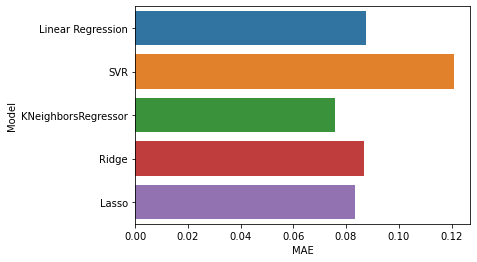

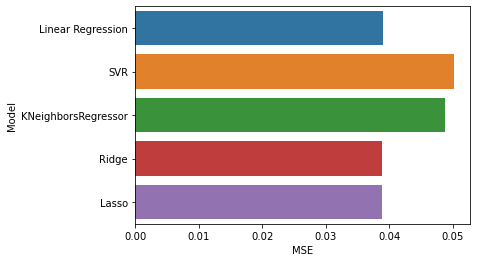

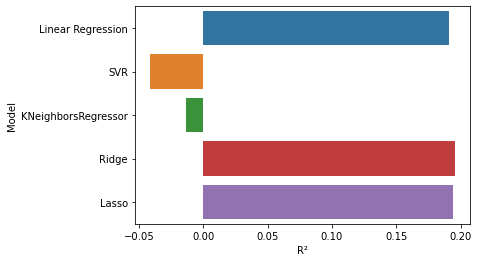

In [164]:
#On représente ces scores sous forme de barplot pour une présentation plus efficace
sns.barplot(x='MAE', y='Model', data=tableau_metrics);
plt.show()

sns.barplot(x='MSE', y='Model', data=tableau_metrics);
plt.show()

sns.barplot(x='R²', y='Model', data=tableau_metrics);
plt.show()

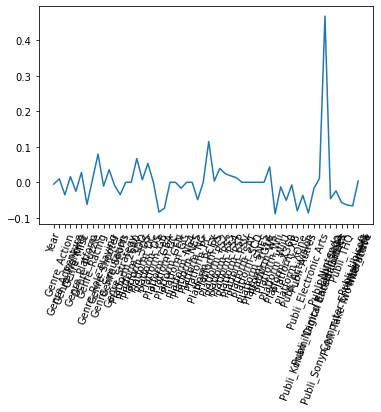

<Figure size 1224x504 with 0 Axes>

In [165]:
#On retient le modèle Ridge parce qu'il a le score le plus haut et on observe ces coefficients
plt.plot(range(len(fusion_data.columns)),ridge_reg.coef_)
plt.xticks(range(len(fusion_data.columns)), fusion_data.columns.values, rotation=70)
plt.figure(figsize=(17,7));

In [166]:
#De nouveau on présentera les coef dans le dataFrame classé par ordre décroissant
tableau_coef_2f = pd.DataFrame({"Variable":fusion_data.columns.values,
                      "Coef":ridge_reg.coef_})
tableau_coef_2f.sort_values('Coef',ascending=False)

,Variable,Coef
49,Publi_Nintendo,0.467746
28,Platform_PS,0.114837
8,Genre_Role-Playing,0.079452
15,Platform_3DS,0.067035
17,Platform_DS,0.053080
39,Platform_Wii,0.043542
30,Platform_PS3,0.038963
10,Genre_Simulation,0.035529
5,Genre_Platform,0.027808
31,Platform_PS4,0.023976


In [59]:
"""Partie Analyse de Sentiments"""

# Séparer la variable explicative de la variable à prédire
X, y = fusion.Avis, fusion.Sentiments

# Séparer le jeu de données en données d'entraînement et données test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialiser un objet vectorisateur
vectorizer = CountVectorizer()

# Mettre à jour la valeur de X_train et X_test
X_train = vectorizer.fit_transform(X_train).todense()
X_test = vectorizer.transform(X_test).todense()

In [60]:
#On crée un modèle ExtraTreesClassifier
tree=ExtraTreesClassifier(n_estimators=100, random_state=1)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

# Calcul et affichage de la matrice de confusion 
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Classe réelle Classifier'], colnames=['Classe prédite Classifier'])
print(confusion_matrix)

# Calcul et affichage de classification_report
print( classification_report(y_test, y_pred) )

score_tree=tree.score(X_test, y_test)

Classe prédite Classifier    1    2   3
Classe réelle Classifier               
1                          313  250   1
2                          152  540   6
3                            9   68  21
              precision    recall  f1-score   support

           1       0.66      0.55      0.60       564
           2       0.63      0.77      0.69       698
           3       0.75      0.21      0.33        98

    accuracy                           0.64      1360
   macro avg       0.68      0.51      0.54      1360
weighted avg       0.65      0.64      0.63      1360



In [61]:
#On crée un modèle randomforest Classifier
forest = RandomForestClassifier(n_estimators=100, random_state=1,max_depth=1000)


forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

# Calcul et affichage de la matrice de confusion 
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Classe réelle Classifier'], colnames=['Classe prédite Classifier'])
print(confusion_matrix)

# Calcul et affichage de classification_report
print( classification_report(y_test, y_pred) )

score_forest=forest.score(X_test, y_test)

Classe prédite Classifier    1    2   3
Classe réelle Classifier               
1                          302  261   1
2                          138  554   6
3                            9   67  22
              precision    recall  f1-score   support

           1       0.67      0.54      0.60       564
           2       0.63      0.79      0.70       698
           3       0.76      0.22      0.35        98

    accuracy                           0.65      1360
   macro avg       0.69      0.52      0.55      1360
weighted avg       0.66      0.65      0.63      1360



In [62]:
#On teste par le biais d'une pipeline comprenant les deux modèles ci-dessus pour voir s'il y'a la possibilité d'obtenir un meilleur score.
"""""sel = SelectFromModel(ExtraTreesClassifier(n_estimators=50, random_state=1), 
                      threshold='mean')
clf = RandomForestClassifier(n_estimators=100, random_state=1,max_depth=1000)

model = Pipeline([('sel', sel), ('clf', clf)])
params = {'clf__max_features': ['auto', 'sqrt', 'log2']}

gs = GridSearchCV(model, params)
gs.fit(X_train, y_train)

y_pred = gs.predict(X_test)

# Calcul et affichage de la matrice de confusion 
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Classe réelle Classifier'], colnames=['Classe prédite Classifier'])
print(confusion_matrix)

# Calcul et affichage de classification_report
print( classification_report(y_test, y_pred) )

one=gs.score(X_test, y_test)"""

'""sel = SelectFromModel(ExtraTreesClassifier(n_estimators=50, random_state=1), \n                      threshold=\'mean\')\nclf = RandomForestClassifier(n_estimators=100, random_state=1,max_depth=1000)\n\nmodel = Pipeline([(\'sel\', sel), (\'clf\', clf)])\nparams = {\'clf__max_features\': [\'auto\', \'sqrt\', \'log2\']}\n\ngs = GridSearchCV(model, params)\ngs.fit(X_train, y_train)\n\ny_pred = gs.predict(X_test)\n\n# Calcul et affichage de la matrice de confusion \nconfusion_matrix = pd.crosstab(y_test, y_pred, rownames=[\'Classe réelle Classifier\'], colnames=[\'Classe prédite Classifier\'])\nprint(confusion_matrix)\n\n# Calcul et affichage de classification_report\nprint( classification_report(y_test, y_pred) )\n\none=gs.score(X_test, y_test)'

In [63]:
#On affiche le meilleur paramètre du modèle testé
""""gs.best_params_"""""

'"gs.best_params_'

In [64]:
# Enregistrement du modèle 
""""dump(one, 'PiepelineTree.joblib')"""

'"dump(one, \'PiepelineTree.joblib\')'

In [65]:
# Chargement du modèle 
one = load('PiepelineTree.joblib') 
one

0.649264705882353

In [66]:
#On teste un modèle decision tree classifer
decision=DecisionTreeClassifier( random_state=1, max_depth=200)

decision.fit(X_train, y_train)

y_pred = decision.predict(X_test)

# Calcul et affichage de la matrice de confusion 
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Classe réelle Classifier'], colnames=['Classe prédite Classifier'])
print(confusion_matrix)

# Calcul et affichage de classification_report
print( classification_report(y_test, y_pred) )

score_decision=decision.score(X_test, y_test)

Classe prédite Classifier    1    2   3
Classe réelle Classifier               
1                          332  215  17
2                          241  426  31
3                           25   50  23
              precision    recall  f1-score   support

           1       0.56      0.59      0.57       564
           2       0.62      0.61      0.61       698
           3       0.32      0.23      0.27        98

    accuracy                           0.57      1360
   macro avg       0.50      0.48      0.49      1360
weighted avg       0.57      0.57      0.57      1360



In [67]:
#On va tester le  modèle KNeighborsClassifier sur un échantillon de 40 voisins différents avec des metrics différentess
"""""score_minko = []
score_man = []
score_cheb = []

for k in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score_minko.append(knn.score(X_test, y_test))

for k in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(X_train, y_train)
    score_man.append(knn.score(X_test, y_test))
    
for k in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn.fit(X_train, y_train)
    score_cheb.append(knn.score(X_test, y_test))
    
#On affiche les résultats sur le graphique afin de choisir les bons paramètres 
plt.plot(range(1, 41), score_minko, color='blue', linestyle='dashed', lw=2, label='Minkowski')
plt.plot(range(1, 41), score_man, color='orange', linestyle='dashed', lw=2, label='Manhattan')
plt.plot(range(1, 41), score_cheb, color='red', linestyle='dashed', lw=2, label='Chebyshev')
plt.title('Score - valeur de K')  
plt.xlabel('Valeur de K')  
plt.ylabel('Accuracy') 
plt.legend();"""""

'""score_minko = []\nscore_man = []\nscore_cheb = []\n\nfor k in range(1, 41):\n    knn = KNeighborsClassifier(n_neighbors=k)\n    knn.fit(X_train, y_train)\n    score_minko.append(knn.score(X_test, y_test))\n\nfor k in range(1, 41):\n    knn = KNeighborsClassifier(n_neighbors=k, metric=\'manhattan\')\n    knn.fit(X_train, y_train)\n    score_man.append(knn.score(X_test, y_test))\n    \nfor k in range(1, 41):\n    knn = KNeighborsClassifier(n_neighbors=k, metric=\'chebyshev\')\n    knn.fit(X_train, y_train)\n    score_cheb.append(knn.score(X_test, y_test))\n    \n#On affiche les résultats sur le graphique afin de choisir les bons paramètres \nplt.plot(range(1, 41), score_minko, color=\'blue\', linestyle=\'dashed\', lw=2, label=\'Minkowski\')\nplt.plot(range(1, 41), score_man, color=\'orange\', linestyle=\'dashed\', lw=2, label=\'Manhattan\')\nplt.plot(range(1, 41), score_cheb, color=\'red\', linestyle=\'dashed\', lw=2, label=\'Chebyshev\')\nplt.title(\'Score - valeur de K\')  \nplt.xla

In [68]:
# Enregistrement du modèle 
"""""dump([score_minko,score_man,score_cheb], 'KNeighborsClassifier.joblib')"""""

'""dump([score_minko,score_man,score_cheb], \'KNeighborsClassifier.joblib\')'

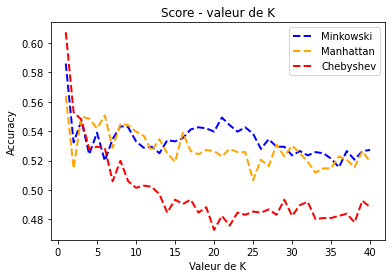

In [69]:
#On importe le modèle enregistré
score_minko,score_man,score_cheb= load('KNeighborsClassifier.joblib') 
#On affiche les résultats sur le graphique afin de choisir les bons paramètres 
plt.plot(range(1, 41), score_minko, color='blue', linestyle='dashed', lw=2, label='Minkowski')
plt.plot(range(1, 41), score_man, color='orange', linestyle='dashed', lw=2, label='Manhattan')
plt.plot(range(1, 41), score_cheb, color='red', linestyle='dashed', lw=2, label='Chebyshev')
plt.title('Score - valeur de K')  
plt.xlabel('Valeur de K')  
plt.ylabel('Accuracy') 
plt.legend();

In [70]:
#On applique les bons paramètres sur notre modèle KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=1, metric='chebyshev')
knc.fit(X_train, y_train)
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Classe réelle Logistic'], colnames=['Classe prédite Logistic'])
print(confusion_matrix)
print( classification_report(y_test, y_pred) )
knc_score=knc.score(X_test, y_test)
knc_score

Classe prédite Logistic    1    2   3
Classe réelle Logistic               
1                        332  215  17
2                        241  426  31
3                         25   50  23
              precision    recall  f1-score   support

           1       0.56      0.59      0.57       564
           2       0.62      0.61      0.61       698
           3       0.32      0.23      0.27        98

    accuracy                           0.57      1360
   macro avg       0.50      0.48      0.49      1360
weighted avg       0.57      0.57      0.57      1360



0.6073529411764705

In [71]:
#On crée un modèle SVC en faisant des tests d'hyper paramètre
model_SVC=SVC(random_state=1)



model_SVC.fit(X_train, y_train)


y_pred = model_SVC.predict(X_test)


confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Classe réelle Logistic'], colnames=['Classe prédite Logistic'])
print(confusion_matrix)


print( classification_report(y_test, y_pred) )

score_svc=model_SVC.score(X_test, y_test)

Classe prédite Logistic    1    2  3
Classe réelle Logistic              
1                        257  307  0
2                        138  560  0
3                         12   83  3
              precision    recall  f1-score   support

           1       0.63      0.46      0.53       564
           2       0.59      0.80      0.68       698
           3       1.00      0.03      0.06        98

    accuracy                           0.60      1360
   macro avg       0.74      0.43      0.42      1360
weighted avg       0.64      0.60      0.57      1360



In [72]:
# On teste à présent sur le moèdle Xgboost
boost = XGBClassifier(random_state=1)
boost.fit(X_train, y_train)


y_pred = boost.predict(X_test)


confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Classe réelle Logistic'], colnames=['Classe prédite Logistic'])
print(confusion_matrix)


print( classification_report(y_test, y_pred) )

score_xgoost=boost.score(X_test, y_test)

C:\Users\Thomas\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[04:54:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classe prédite Logistic    1    2   3
Classe réelle Logistic               
1                        319  244   1
2                        191  498   9
3                          7   70  21
              precision    recall  f1-score   support

           1       0.62      0.57      0.59       564
           2       0.61      0.71      0.66       698
           3       0.68      0.21      0.33        98

    accuracy                           0.62      1360
   macro avg       0.64      0.50      0.53      1360
weighted avg       0.62      0.62      0.61      1360



In [73]:
#On crée un modèle  Bernouilli Naive Bayes classifier 
bernoulli = BernoulliNB()
bernoulli.fit(X_train, y_train)


y_pred = bernoulli.predict(X_test)


confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Classe réelle Logistic'], colnames=['Classe prédite Logistic'])
print(confusion_matrix)


print( classification_report(y_test, y_pred) )

score_bernoulli=bernoulli.score(X_test, y_test)

Classe prédite Logistic    1    2  3
Classe réelle Logistic              
1                        343  221  0
2                        185  507  6
3                         16   74  8
              precision    recall  f1-score   support

           1       0.63      0.61      0.62       564
           2       0.63      0.73      0.68       698
           3       0.57      0.08      0.14        98

    accuracy                           0.63      1360
   macro avg       0.61      0.47      0.48      1360
weighted avg       0.63      0.63      0.61      1360



In [74]:
#On crée un modèle  multinomial Naive Bayes classifier 
multinomial = MultinomialNB()
multinomial.fit(X_train, y_train)


y_pred = multinomial.predict(X_test)


confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Classe réelle Logistic'], colnames=['Classe prédite Logistic'])
print(confusion_matrix)


print( classification_report(y_test, y_pred) )

score_multinomial=multinomial.score(X_test, y_test)

Classe prédite Logistic    1    2   3
Classe réelle Logistic               
1                        364  199   1
2                        193  498   7
3                         19   68  11
              precision    recall  f1-score   support

           1       0.63      0.65      0.64       564
           2       0.65      0.71      0.68       698
           3       0.58      0.11      0.19        98

    accuracy                           0.64      1360
   macro avg       0.62      0.49      0.50      1360
weighted avg       0.64      0.64      0.63      1360



In [75]:
#On crée un modèle de regression logistic en faisant des tests d'hyper-paramètre
model_lr=LogisticRegression(random_state=1, max_iter=1000)

grid_values = {'C': (0.03,0.04)}


model_LR = GridSearchCV(model_lr, param_grid=grid_values)

model_LR.fit(X_train, y_train)


y_pred = model_LR.predict(X_test)


confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Classe réelle Logistic'], colnames=['Classe prédite Logistic'])
print(confusion_matrix)


print( classification_report(y_test, y_pred) )

two=model_LR.score(X_test, y_test)

Classe prédite Logistic    1    2   3
Classe réelle Logistic               
1                        352  211   1
2                        204  489   5
3                         16   62  20
              precision    recall  f1-score   support

           1       0.62      0.62      0.62       564
           2       0.64      0.70      0.67       698
           3       0.77      0.20      0.32        98

    accuracy                           0.63      1360
   macro avg       0.68      0.51      0.54      1360
weighted avg       0.64      0.63      0.62      1360



In [76]:
#On affiche le meilleur paramètre du modèle testé
model_LR.best_params_

{'C': 0.04}

In [77]:
#On test un modèle de GradientBoosting
"""""clf = GradientBoostingClassifier( max_depth=1, random_state=1)

param_test1 = {'n_estimators': [100]}
               
gb = GridSearchCV(clf,param_test1)

gb.fit(X_train, y_train)


y_pred = gb.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Classe réelle Gradient'], colnames=['Classe prédite Gradient'])
print(confusion_matrix)


print( classification_report(y_test, y_pred) )

three=gb.score(X_test, y_test)"""""

'""clf = GradientBoostingClassifier( max_depth=1, random_state=1)\n\nparam_test1 = {\'n_estimators\': [100]}\n               \ngb = GridSearchCV(clf,param_test1)\n\ngb.fit(X_train, y_train)\n\n\ny_pred = gb.predict(X_test)\n\nconfusion_matrix = pd.crosstab(y_test, y_pred, rownames=[\'Classe réelle Gradient\'], colnames=[\'Classe prédite Gradient\'])\nprint(confusion_matrix)\n\n\nprint( classification_report(y_test, y_pred) )\n\nthree=gb.score(X_test, y_test)'

In [78]:
# Enregistrement du modèle 
"""""dump(three, 'GradientBoostingClassifier.joblib')"""""

'""dump(three, \'GradientBoostingClassifier.joblib\')'

In [79]:
#On importe le modèle enregistré
three = load('GradientBoostingClassifier.joblib') 
three

0.5404411764705882

In [80]:
#On affiche dans un DataFrame les scores des modèles testés
tableau_score = pd.DataFrame({"Model":['Tree Classifier','Random Forest','Tree Pipeline','Decision Tree','Logistic Regression','Gradient Boosting Classifier','KNeighbors Classifier','BernouilliNB','MultinomialNB','SVC','XGboost'],
                      "Accuracy":[score_tree,score_forest,one,score_decision, two, three, knc_score,score_bernoulli,score_multinomial,score_svc,score_xgoost]})
tableau_score.sort_values("Accuracy",ascending=False)

,Model,Accuracy
2,Tree Pipeline,0.649265
1,Random Forest,0.645588
0,Tree Classifier,0.642647
8,MultinomialNB,0.641912
4,Logistic Regression,0.633088
7,BernouilliNB,0.630882
10,XGboost,0.616176
6,KNeighbors Classifier,0.607353
9,SVC,0.602941
3,Decision Tree,0.574265


In [81]:
tableau_score.to_csv("Score_analyse_sentiments.csv")

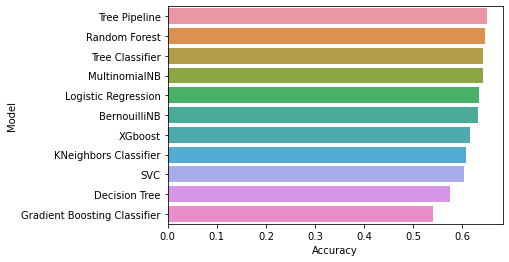

In [82]:
#On reprend les scores sous forme de graphique
sns.barplot(x='Accuracy', y='Model', data=tableau_score.sort_values("Accuracy",ascending=False));

In [83]:
#On crée une fonction groupBy calculant la moyenne ainsi que le nombre de jeux par consoles
dfplatform=fusion.groupby("Platform").agg({'Note_meta':['mean','count']})
dfplatform.sort_values(('Note_meta','mean'),ascending=False)

Note_meta      
               mean count
Platform                 
DC        87.307692    13
N64       78.866667    60
PC        76.683690   607
PS        75.551724   145
XOne      74.567568   111
PS4       73.567251   171
WiiU      72.786885    61
PS3       71.548252   715
PSV       71.340206    97
XB        71.162461   634
GC        71.151832   382
X360      70.273418   790
GBA       69.758514   323
PS2       69.600866  1155
3DS       68.929078   141
PSP       68.671018   383
DS        66.643116   552
Wii       65.556522   460

In [84]:
#On crée une fonction groupBy calculant la moyenne ainsi que le nombre de jeux par marque
dfmarque=fusion.groupby("Marque").agg({'Note_meta':['mean','count']})
dfmarque.sort_values(('Note_meta','mean'),ascending=False)

Note_meta      
                mean count
Marque                    
Sega       87.307692    13
PC         76.683690   607
Microsoft  70.951140  1535
Sony       70.630908  2666
Nintendo   68.492168  1979

In [85]:
#On calcul la moyenne(en millions) ainsi que le nombre de jeux vendus suivant que celui-ci appartient à une des 3 catégories 
dfsentiment=fusion.groupby("Sentiments").agg({'Global_Sales':['mean','count']})
dfsentiment

Global_Sales      
                   mean count
Sentiments                   
1              1.267715  2910
2              0.419197  3412
3              0.237971   478

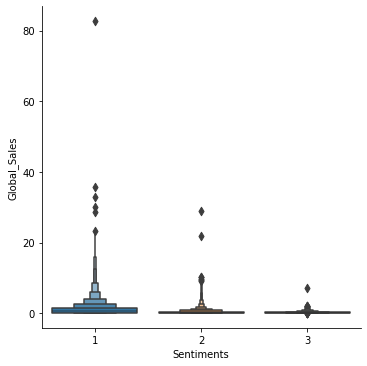

In [86]:
#On vérifie que les ventes globales sont corrélées à la notation des jeux ce qui est le cas en l'espèce
sns.catplot(x="Sentiments", y="Global_Sales", data=fusion, kind="boxen");

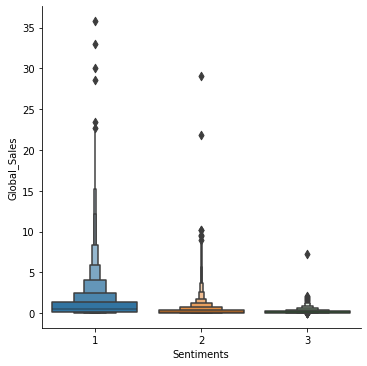

In [87]:
#On enlève le jeux Wii Sport qui était fourni pour l'achat d'une Wii
fusion2=fusion[(fusion["Global_Sales"]<60)]
sns.catplot(x="Sentiments", y="Global_Sales", data=fusion2, kind="boxen");